In [1]:
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
#Custom settings to make pandas output look better
pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 27)

#Convert values from scientific notation to float notation with 2 decimal places 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#Use pandas command to read the loan csv file and assign it to a variable
#Select the columns of interest
loan = pd.read_csv('lendingclub_loan.csv.gz', compression='gzip', index_col=0, usecols=['term', 'int_rate', 'grade',
            'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
            'loan_status', 'purpose', 'addr_state', 'dti', 'revol_util', 'fico_range_low', 'settlement_status', 
            'settlement_term']).fillna(0) 
loan.head(3)

c:\users\blueberry.blueberry\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


int_rate grade home_ownership  annual_inc verification_status  \
term                                                                        
 60 months     12.39     C           RENT    78000.00     Source Verified   
 36 months      6.99     A       MORTGAGE    58000.00        Not Verified   
 60 months     15.59     D           RENT    63800.00     Source Verified   

             issue_d  loan_status             purpose addr_state   dti  \
term                                                                     
 60 months  Dec-2014   Fully Paid  debt_consolidation         VA 12.03   
 36 months  Dec-2014  Charged Off         credit_card         CA 14.92   
 60 months  Dec-2014   Fully Paid         credit_card         MO 18.49   

            fico_range_low  revol_util settlement_status  settlement_term  
term                                                                       
 60 months          750.00       29.00                 0             0.00  
 36 months          710.00       31.60                 0             0.00  
 60 months          685.00       76.20                 0             0.00

In [4]:
#Look at the shape of the data frame
loan.shape

(2004091, 14)

In [5]:
#Filter the Northeastern states
addr_state = ['CT', 'MA', 'MD', 'ME', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
NE_loan = loan[loan['addr_state'].isin(addr_state)]

#Look at the column names
NE_loan.columns.values

array(['int_rate', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'fico_range_low', 'revol_util',
       'settlement_status', 'settlement_term'], dtype=object)

In [6]:
#Create a year column from the issue date column 
NE_loan['Year'] = pd.DatetimeIndex(NE_loan['issue_d']).year

c:\users\blueberry.blueberry\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
#Filter the years of interest (2014-2017)
NE_loan=NE_loan.ix[(NE_loan['Year']>2013) & (NE_loan['Year']<2018)]

c:\users\blueberry.blueberry\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [8]:
#Reset index and rename a column
NE_loan=NE_loan.reset_index()
NE_loan=NE_loan.rename(columns = {'addr_state':'State'})

In [9]:
#Look at the shape of the new data frame
NE_loan.shape

(352059, 16)

In [10]:
#Create a count variable for recording the number of loans when grouping by another variable
NE_loan['Number of Loans'] = 1

In [11]:
#Rename two unique values from one column of the NE_loan data frame
NE_loan['loan_status']=NE_loan['loan_status'].replace({'Late (31-120 days)': 'Late', 'Late (16-30 days)':'Late'})

In [12]:
#Slice the NE_loan data frame
#Group the data frame by Year and grade and average the int_rate column from years 2014-2017
#Plot Average Interest Rate as a line graph
NE_loan.loc[:,['Year','grade', 'int_rate']].groupby(['Year','grade']).mean().unstack().plot(kind='line')

#labelthe X and Y values and adjust the fontsize
pp.xlabel('Year', fontsize=14)
pp.ylabel('Interest Rate (%)', fontsize=14)
#Add a title and adjust the fontsize
pp.suptitle('Average Interest Rate', fontsize=16)

#Change the legend labels and position
pp.legend(['LC Grade A', 'LC Grade B', 'LC Grade C', 'LC Grade D', 'LC Grade E', 'LC Grade F', 
           'LC Grade G'],bbox_to_anchor=(1.0, 0.9))

pp.show()

In [13]:
#Slice the NE_loan data frame
#Group the data frame by Year, grade, and loan_status then sum the Number of Loans column from years 2014-2017
a=NE_loan.loc[:,['Number of Loans', 'loan_status','grade', 'Year']].groupby(['Year', 'grade', 'loan_status']).sum()
#Reset the index of this data frame
a=a.reset_index()

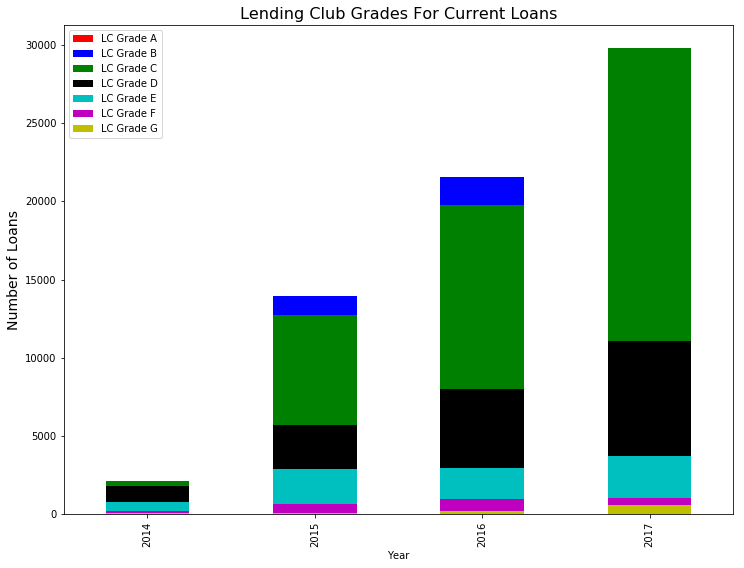

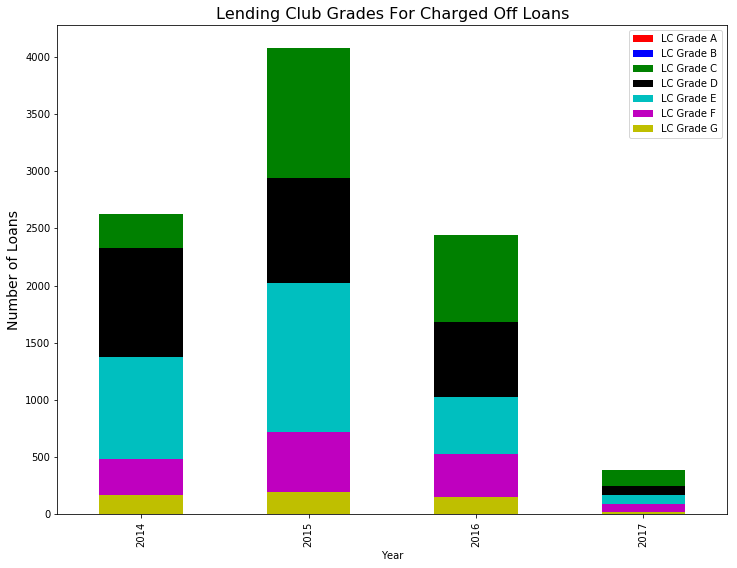

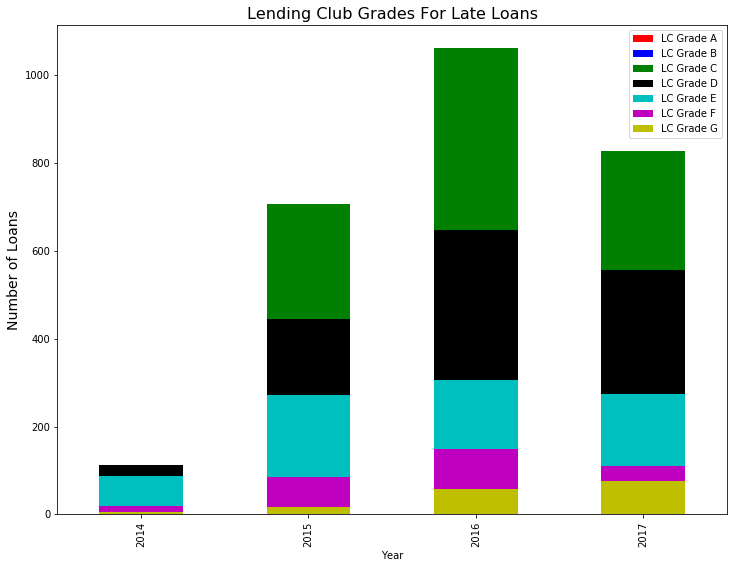

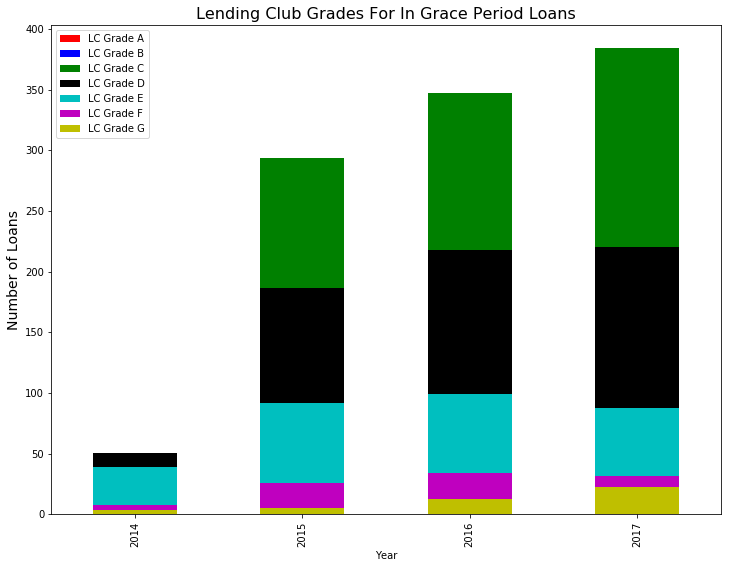

In [14]:
#Create three lists for the years of interest, Lending Club assigned grades, and colors
LR=['Fully Paid', 'Current', 'Charged Off', 'Late', 'In Grace Period']
grade= ['A', 'B', 'C', 'D', 'E', 'F', 'G']
c=['r','b','g','k','c','m','y']

#Plot LC Assigned Grades in a for loop for each year
for i in LR:
    fig=pp.figure(figsize=(12,9))
    ax=fig.add_subplot(111)
    for j in range(len(grade)):
        #Select all the grades for each given loan status
        #Group Year, grade, and Number of loans columns and set the index to Year
        a[(a['loan_status']==i) & (a['grade']==grade[j])][['Year','grade', 
                                                'Number of Loans']].set_index('Year').plot(kind='bar',color=c[j],ax=ax)
    
    #labelthe X and Y values and adjust the fontsize
    pp.ylabel('Number of Loans', fontsize=14)
    pp.xlabel('Year')
    #Change legend labels
    pp.legend(['LC Grade A', 'LC Grade B', 'LC Grade C', 'LC Grade D', 'LC Grade E', 'LC Grade F', 'LC Grade G']) 
    #Add a title and adjust the fontsize
    pp.title('Lending Club Grades For '+ str(i) +' Loans', fontsize=16)
    pp.show()

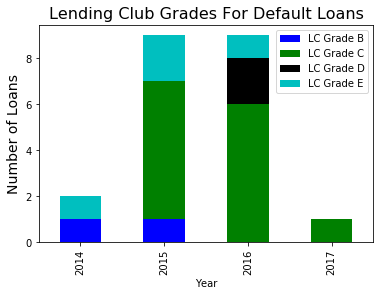

In [15]:
#Slice and sort the NE_loan data frame
#Group the data frame by Year, grade, and loan_status 
#Then sum the Number of Loans column from years 2014 to 2017
De=NE_loan.loc[:,['Number of Loans', 'loan_status','grade', 'Year']].groupby(['Year', 'grade', 'loan_status']).sum()
#Reset the index
De=De.reset_index()
#Select default loans
De=De.loc[De['loan_status']=='Default']
#Drop the loan status column
De=De.drop(['loan_status'], axis=1)
#Reset the index
De=De.reset_index()
#Drop the index column
De=De.drop(['index'], axis=1)
#group the data fram by Year and grade 
#Then sum the Number of Loans column
De=De.groupby(['Year', 'grade'])['Number of Loans'].sum()
#Plot Lending Club Grades for default loans as a bar graph
c=['b','g','k','c']
De.unstack().plot(kind='bar', stacked=True, color=c)
#labelthe X and Y values and adjust the fontsize
pp.ylabel('Number of Loans', fontsize=14)
pp.xlabel('Year')
#Change legend labels
pp.legend(['LC Grade B', 'LC Grade C', 'LC Grade D', 'LC Grade E']) 
#Add a title and adjust the fontsize
pp.title('Lending Club Grades For Default Loans', fontsize=16)
pp.show()

Text(0.5,1,'Average Debt-to-Income Ratio')

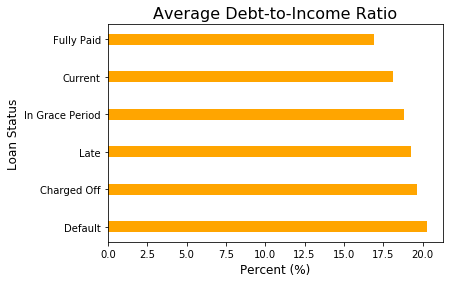

In [16]:
#Slice and sort the NE_loan data frame
#Group the data frame by loan_status then average the dti column from years 2014 to 2017
#Plot Average Debt-to-Income Ratio as a horizontal bar graph
NE_loan.loc[:,['dti','loan_status']].groupby(['loan_status']).mean().sort_values(by='dti', ascending=False).plot(kind='barh', 
                                                                                    width= 0.3, color='orange', legend=False)

#labelthe X and Y values and adjust the fontsize
pp.xlabel('Percent (%)', fontsize=12)
pp.ylabel('Loan Status', fontsize=12)
#Add a title and adjust the fontsize
pp.title('Average Debt-to-Income Ratio', fontsize=16)

In [17]:
#Slice and sort the NE_loan data frame
#Group the data frame by loan_status then average the fico_range_low column from years, 2014-2017
#Plot Average FICO Score as a horizontal bar graph
NE_loan.loc[:,['fico_range_low','loan_status']].groupby(['loan_status']).mean().sort_values(by='fico_range_low', 
                                                        ascending=False).plot(kind='barh', width= 0.3, color='m', legend=False)
#labelthe X and Y values and adjust the fontsize
pp.xlabel('FICO Score', fontsize=12)
pp.ylabel('Loan Status', fontsize=12)
#Add a title and adjust the fontsize
pp.title('Average FICO Score', fontsize=16)

Text(0.5,1,'Average FICO Score')

Text(0.5,1,'Average Revolving Line Utilization Rate (%)')

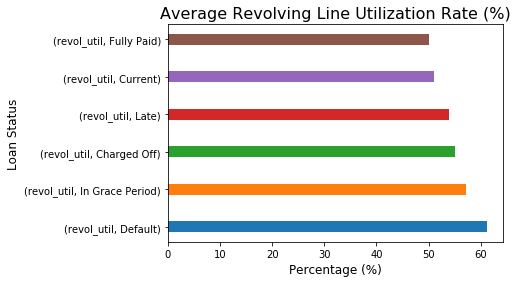

In [18]:
#Slice and sort the NE_loan data frame
#Group the data frame by loan_status then average the revol_util column from years 2014-2017
#Plot Average Revolving Line Utilization Rate as a horizontal bar graph
revol= NE_loan.loc[:,['loan_status', 'revol_util']].groupby(['loan_status']).mean().sort_values(by='revol_util', 
                                                                        ascending=False).unstack().plot(kind='barh', width= 0.3)

#labelthe X and Y values and adjust the fontsize
pp.ylabel('Loan Status', fontsize=12)
pp.xlabel('Percentage (%)', fontsize=12)
#Add a title and adjust the fontsize
pp.title('Average Revolving Line Utilization Rate (%)', fontsize=16)

In [19]:
#Add one column by categorizing the values within the annual_inc column
#based on where they fall within the defined ranges

Filter_method= lambda x: 'Low' if x<45000 else 'Medium-Low' if (x>=45000 and x<65000) else 'Medium-High'if (x>=65000 and 
                                                                        x<136000) else 'High' if (x>=136000) else None
NE_loan['Income']=NE_loan['annual_inc'].apply(Filter_method)

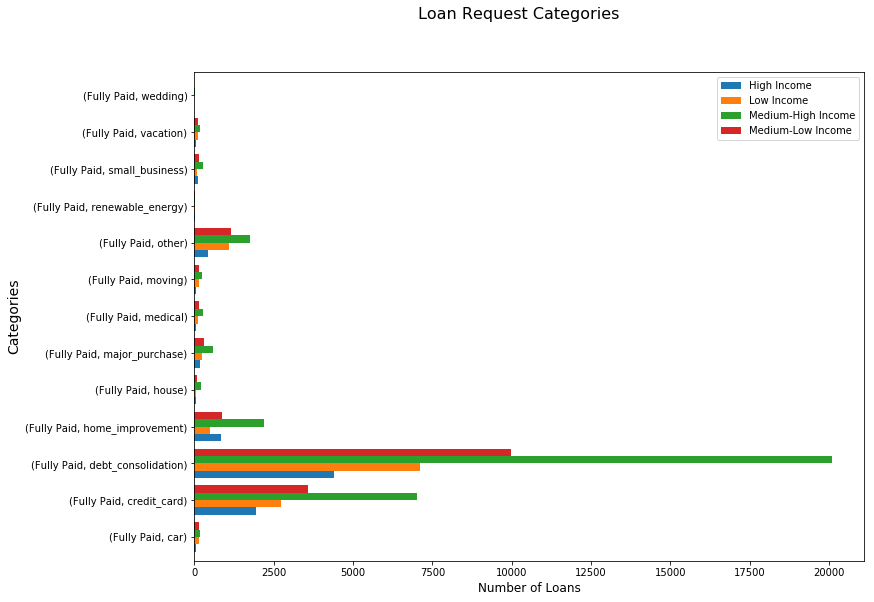

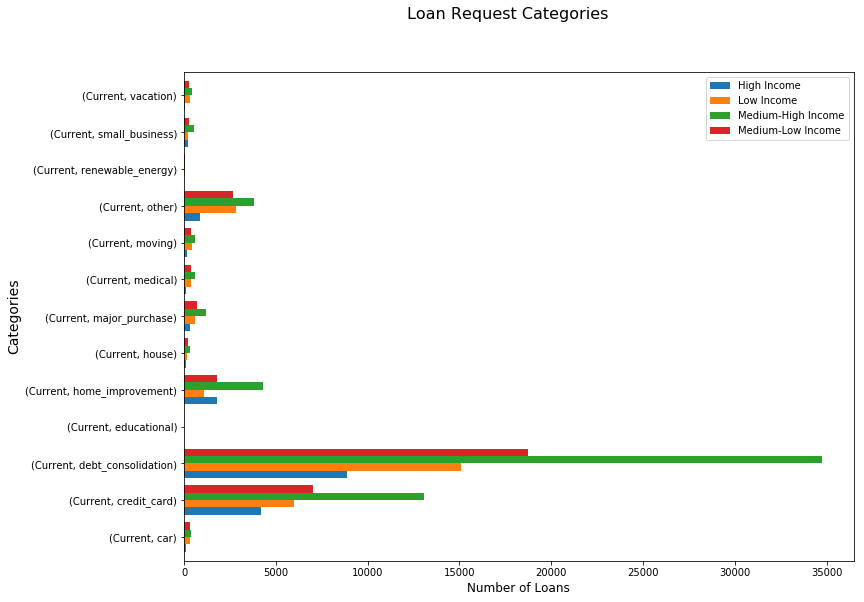

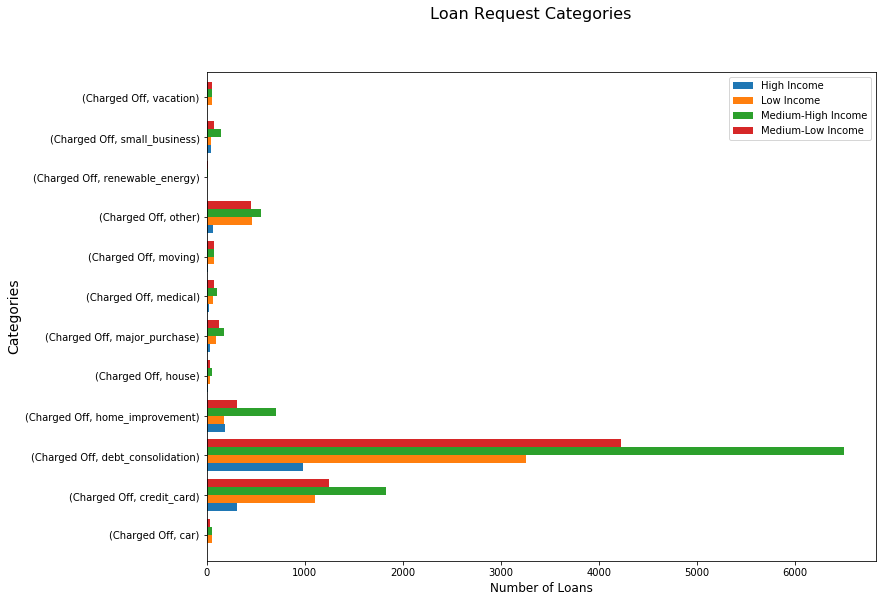

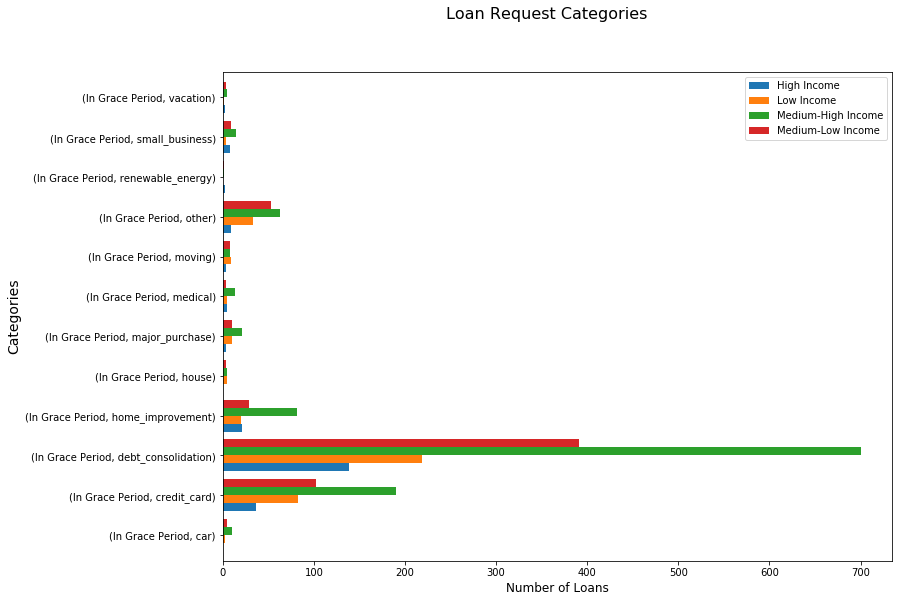

In [20]:
#Slice the NE_loan data frame
#Group the data frame by loan_status, purpose, and Income 
#Sum the Number of Loans column from years 2014-2017
#Plot Loan Request Categories in a for loop
#Create a list of the unique values in the loan_status column
A= list (NE_loan['loan_status'].unique())
for i in A:
    #Select each value from the above list
    purpose= NE_loan.loc[NE_loan['loan_status']==i]
    PL=purpose[purpose.verification_status!='Not Verified']
    PL.loc[:,['Number of Loans','loan_status','purpose','Income']].groupby(['loan_status',
                                            'purpose','Income']).sum().unstack().plot(kind='barh', width= 0.8, figsize=(12,9))
    
    #labelthe X and Y values and adjust the fontsize
    pp.ylabel('Categories', fontsize=14)
    pp.xlabel('Number of Loans', fontsize=12)
    #Add a title and adjust the fontsize
    pp.suptitle('Loan Request Categories', fontsize=16)
    #Change the legend labels
    pp.legend(['High Income', 'Low Income', 'Medium-High Income', 'Medium-Low Income'])

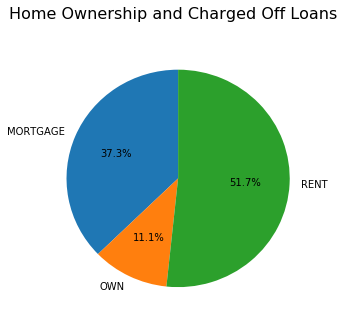

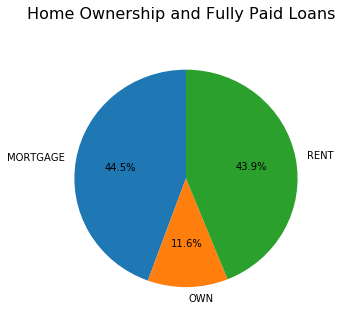

In [21]:
#Slice the NE_loan data frame
#Group the data frame by home_ownership and loan_status and sum the Number of Loans column from years 2014-2017
#Plot Home Ownership in a for loop
HOME= NE_loan.loc[:,['home_ownership','loan_status', 'Number of Loans']]

#Remove 2 values, '0' and 'ANY', from the original home_ownership column
HOME=HOME[HOME.home_ownership!='0']
HOME=HOME[HOME.home_ownership!='ANY']
HOME=HOME.groupby(['home_ownership', 'loan_status']).sum().unstack()

for i in range(6):
    #Transpose the home_ownership columns with the loan_status indexes
    HOME.iloc[:,0:6].T.iloc[i,:].to_frame().plot.pie(subplots=True, figsize=(5,5), startangle=90, autopct='%.1f%%', legend=False)
    
    #Turn off the axis lines and labels
    pp.axis('off')
    #Create a list of the unique values within the loan_status column for the title
    Loans= ['Charged Off', 'Current', 'Default', 'Fully Paid', 'In Grace Period', 'Late']
    pp.suptitle('Home Ownership and ' + str(Loans[i])+ ' Loans', fontsize=16)

In [22]:
#Slice the NE_loan data frame and group the data frame by Year and loan_status
#Sum the Number of Loans column from years 2014-2017
NE_loan.loc[:,['Year','Number of Loans','loan_status']].groupby(['loan_status', 'Year']).sum().unstack()

Number of Loans                     
Year                       2014   2015   2016   2017
loan_status                                         
Charged Off                8995  13091   7555   1155
Current                    6259  44912  65606  90315
Default                       2      9      9      1
Fully Paid                38429  34187  21711   8829
In Grace Period             153    883   1008   1033
Late                        395   2149   3033   2340

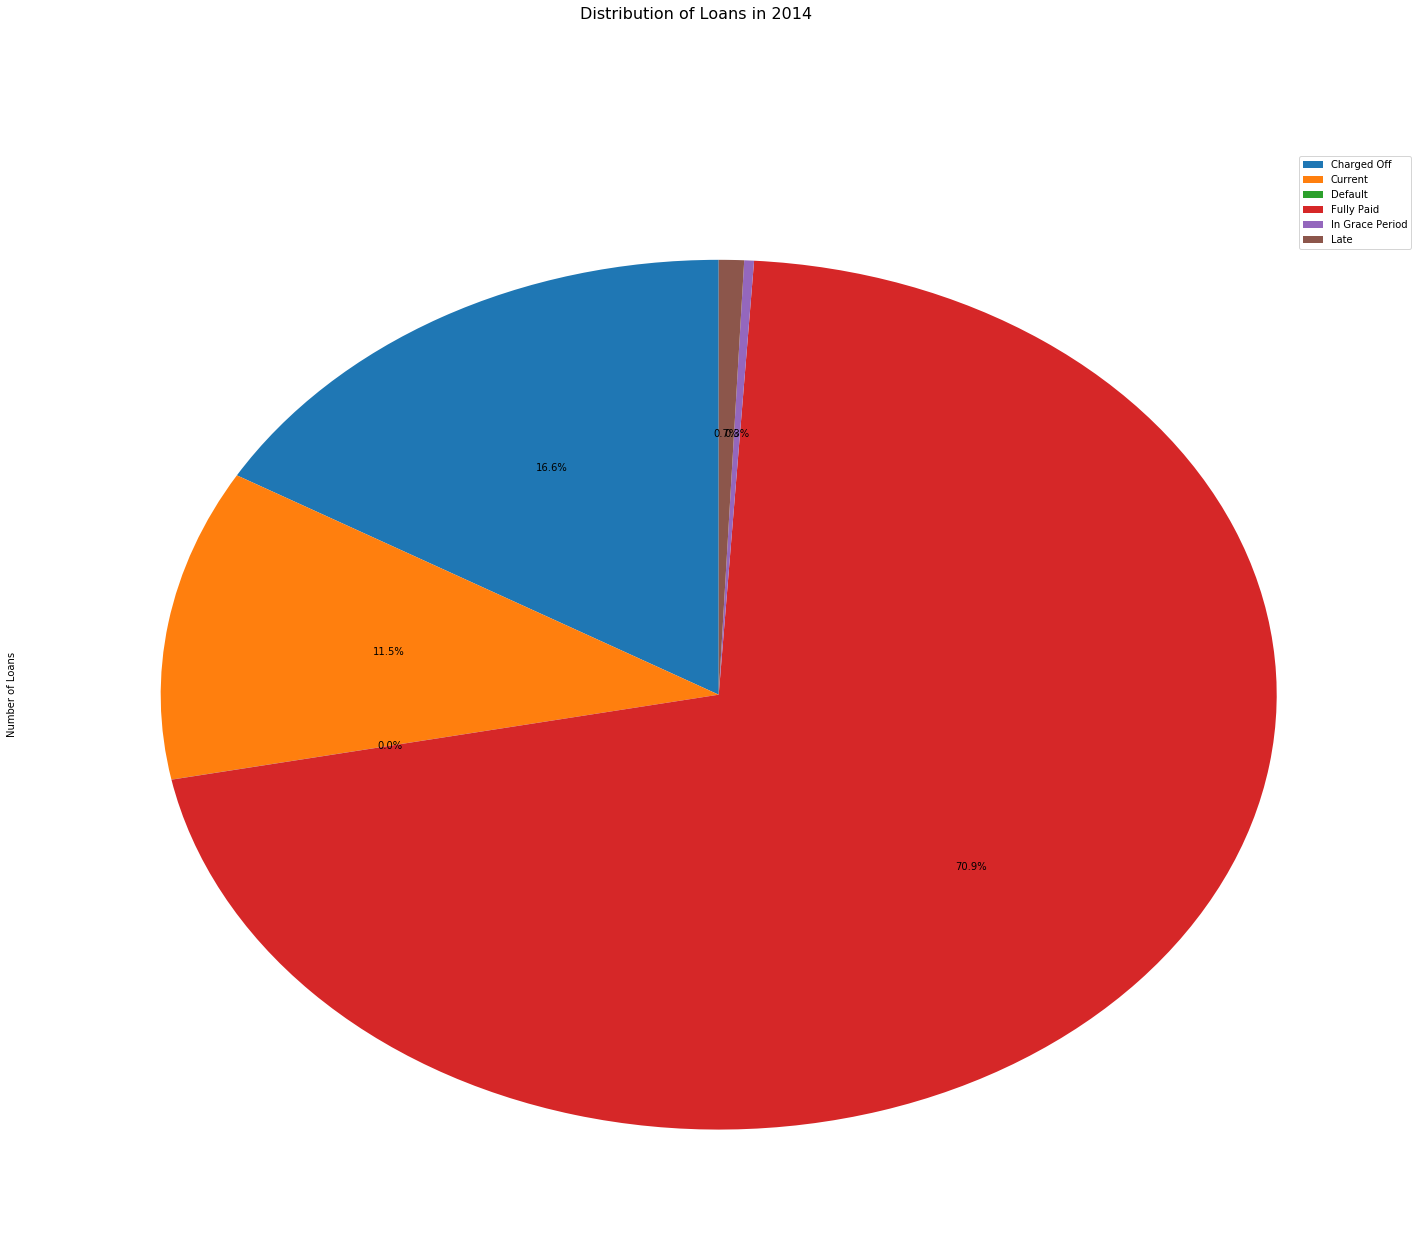

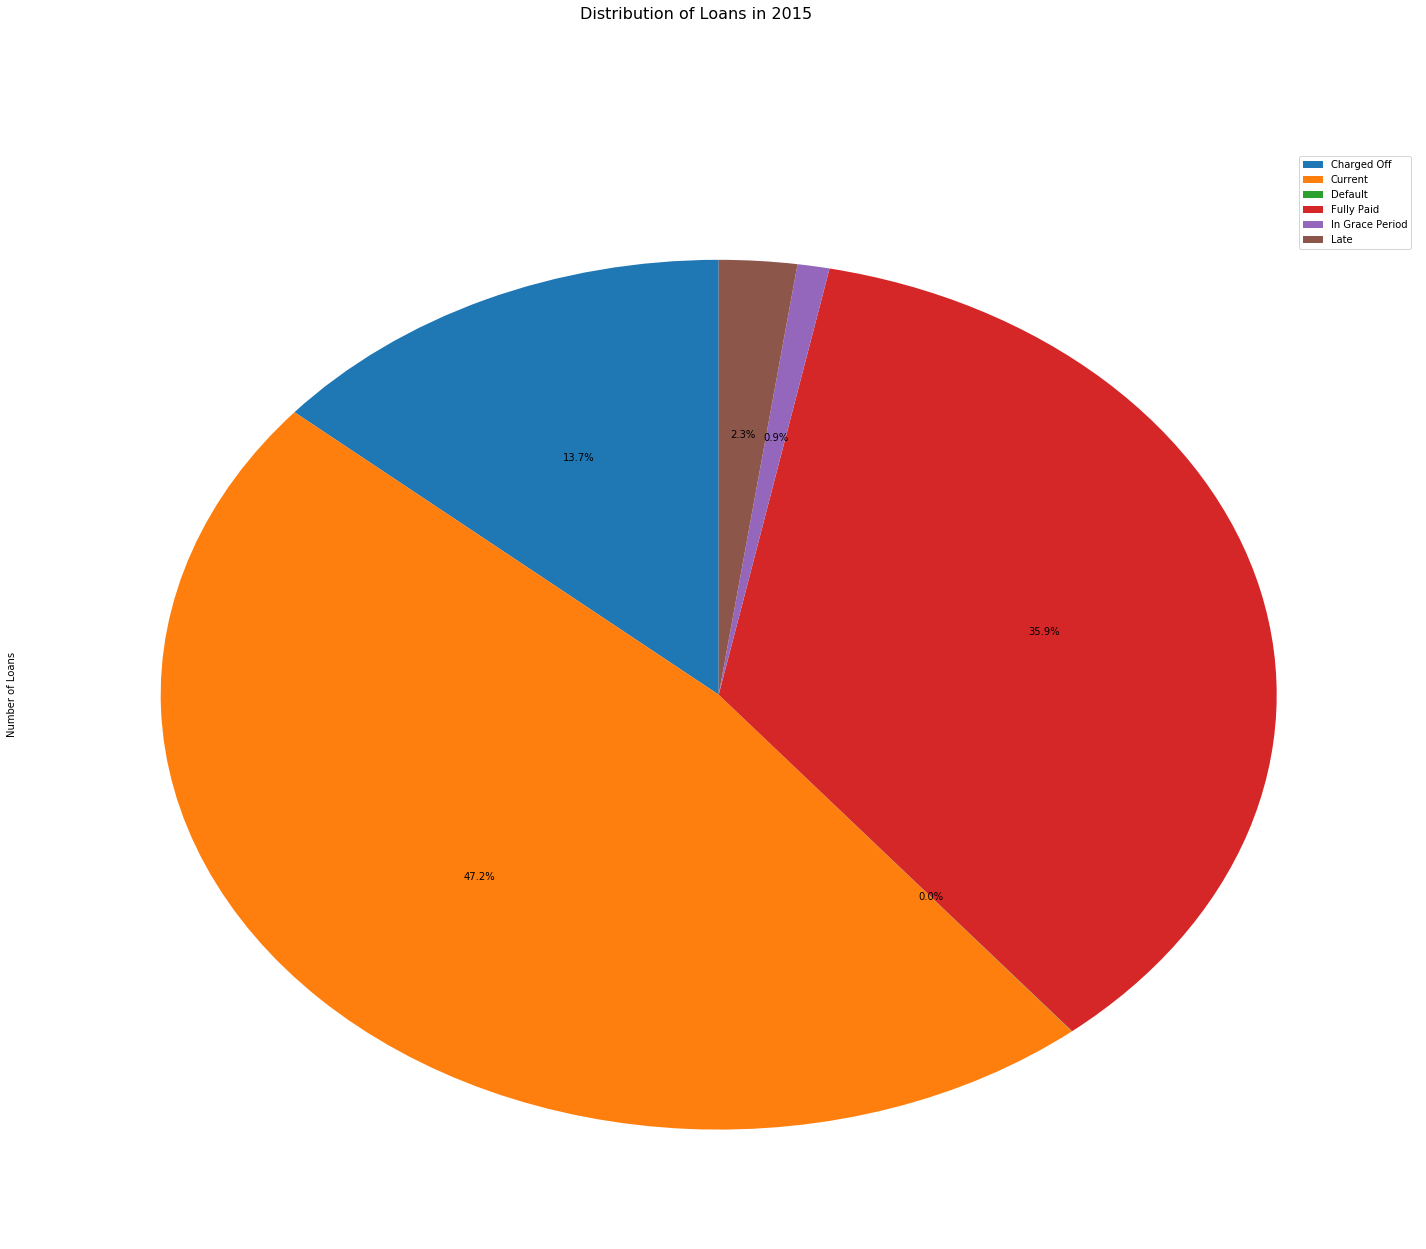

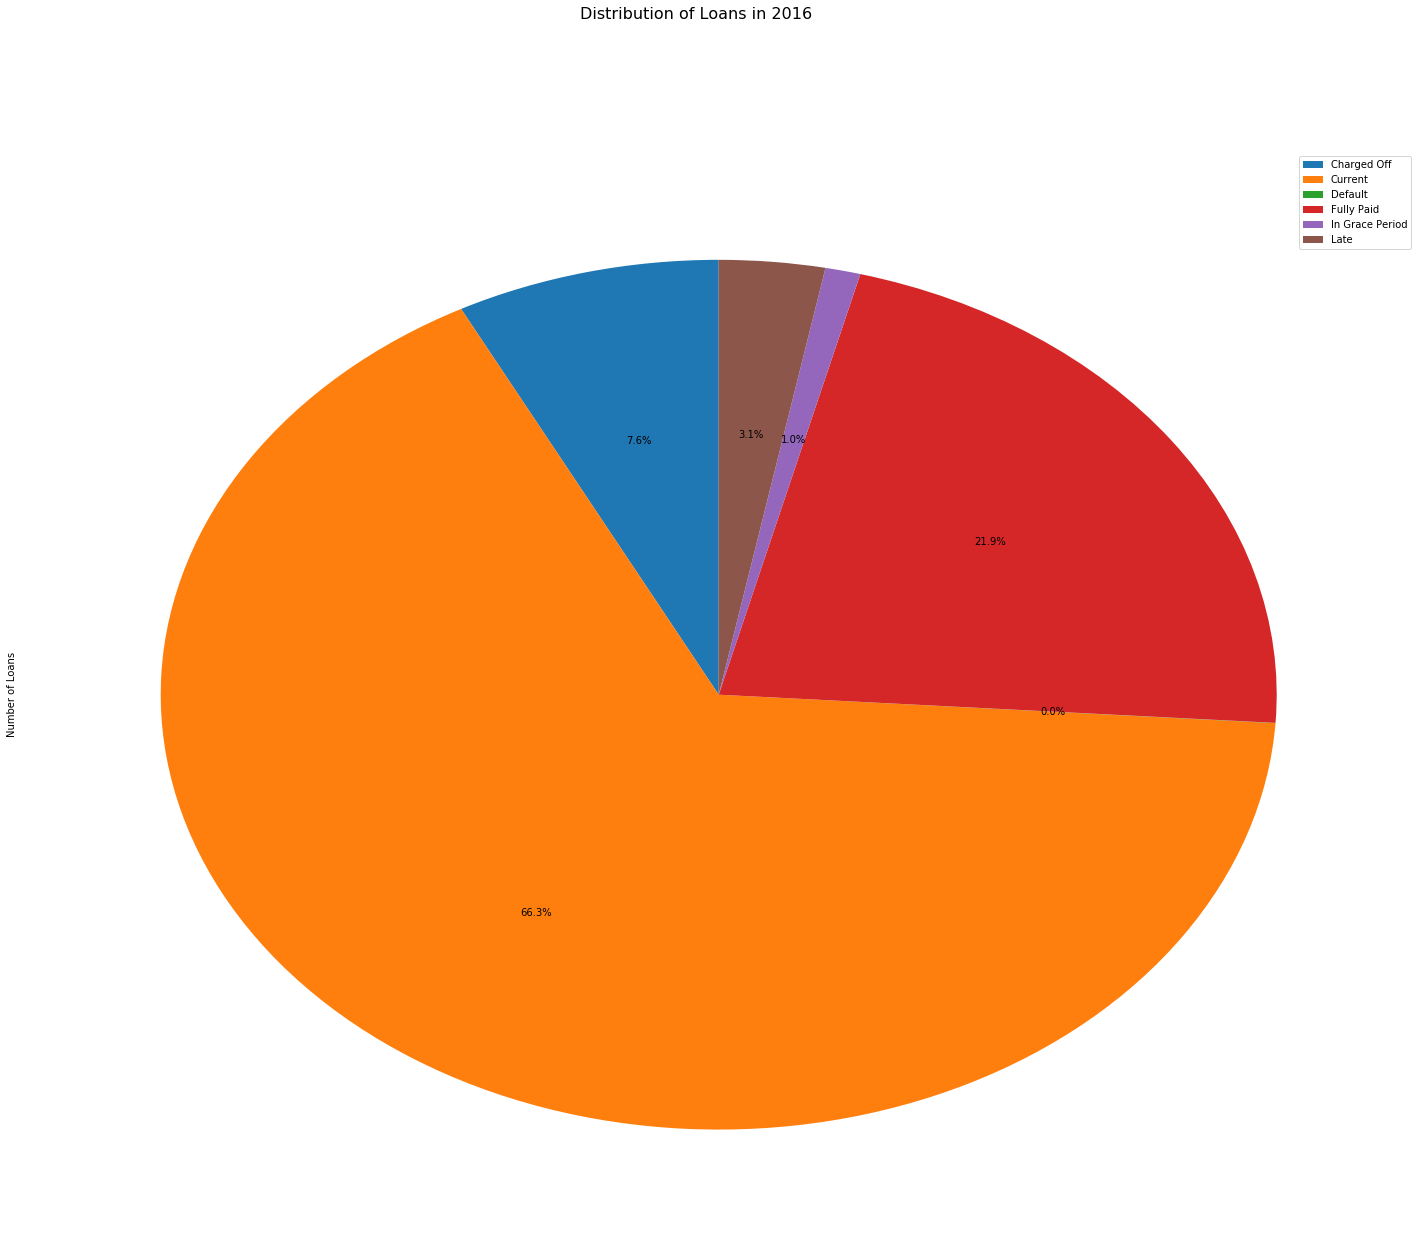

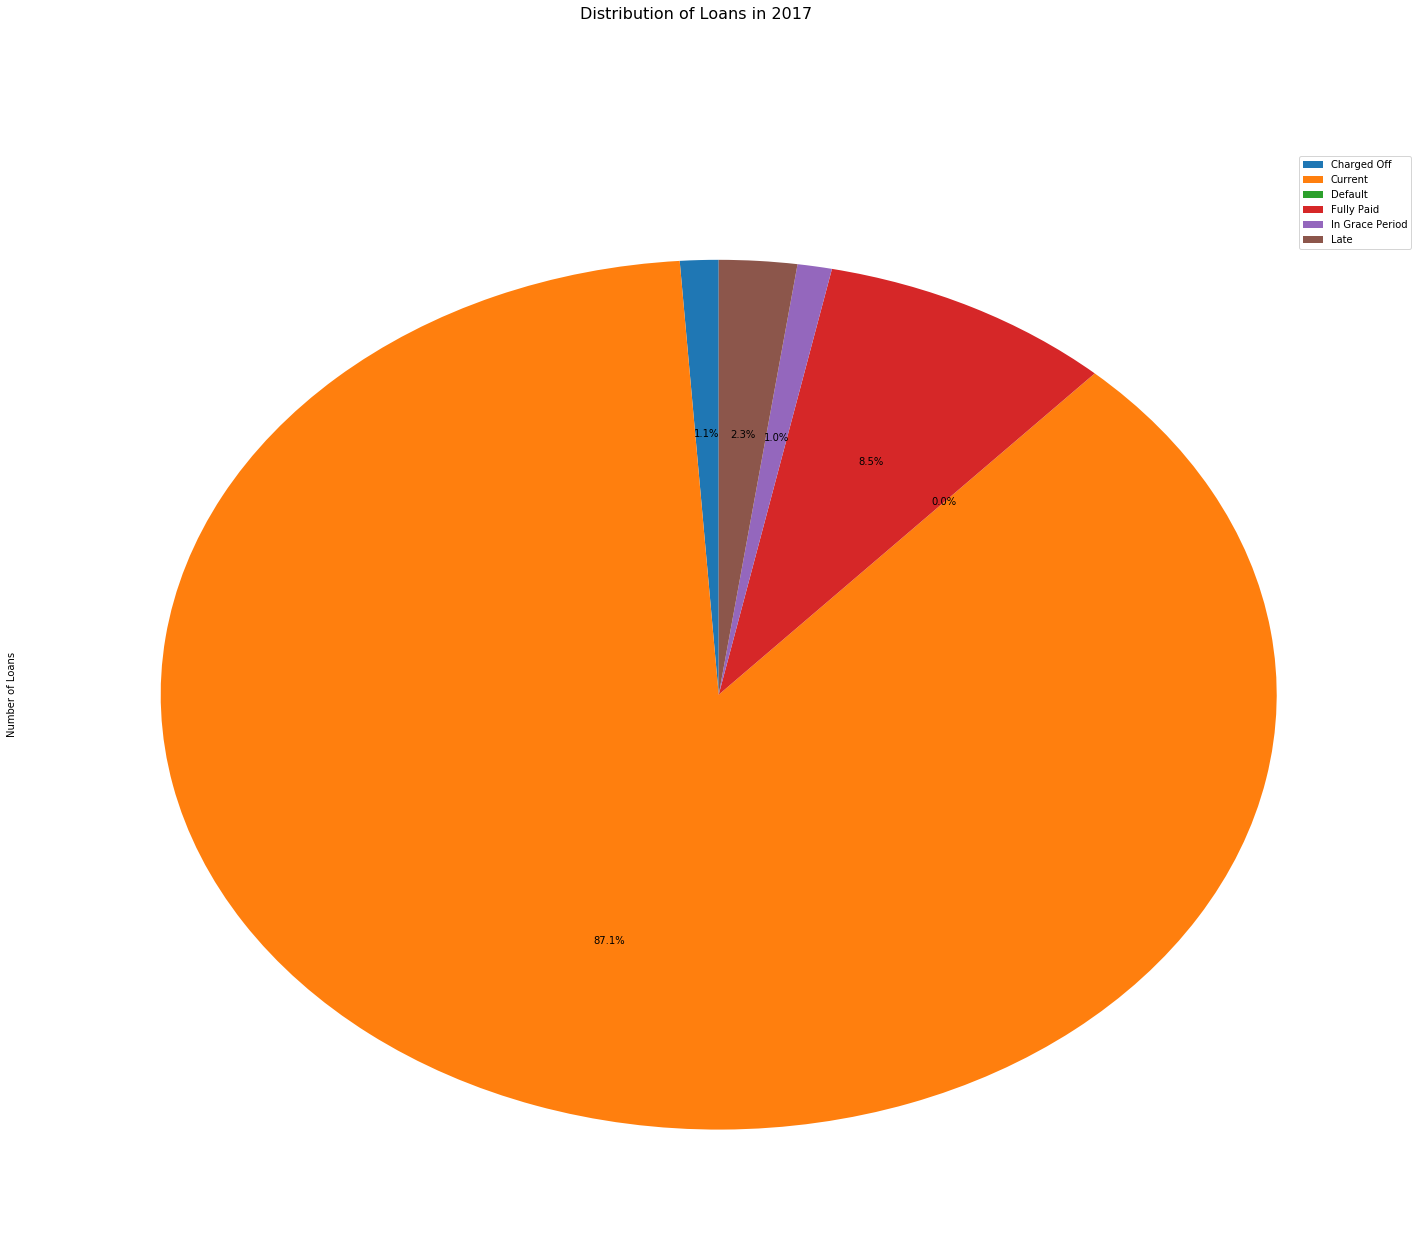

In [23]:
#Slice the NE_loan data frame
#Group the data frame by loan_status
#Sum the Number of Loans column from years 2014-2017 and plot Loan status in a for loop
#Create a list for the loop
A=[2014, 2015, 2016, 2017]
for i in A:
    Stat= NE_loan.loc[NE_loan['Year']==i]
    ST=Stat.loc[:,['Number of Loans','loan_status']].groupby(['loan_status']).sum()
    ST=ST.unstack(level=0).to_frame().rename(columns= {0: 'Number of Loans'}).plot(kind='pie',subplots='True', figsize=(25,20), 
                                startangle=90, legend=False, autopct='%.1f%%',labels=['','','','','','']) #Remove labels
    
    
    #Add a title
    pp.suptitle('Distribution of Loans in ' +str(i), fontsize=16)
    #Change the legend labels
    pp.legend(['Charged Off', 'Current', 'Default', 'Fully Paid', 'In Grace Period', 'Late'])
    pp.show()

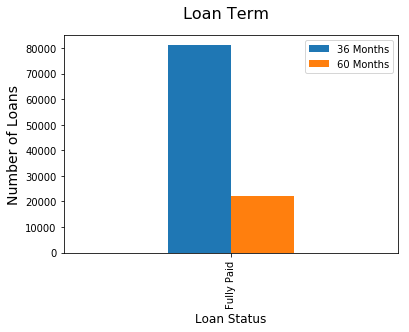

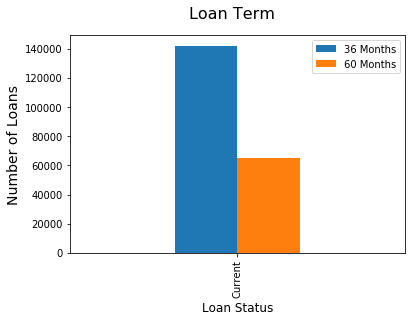

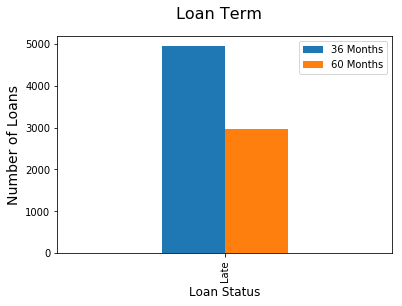

In [24]:
#Slice the NE_loan data frame
#Group the data frame by loan_status and term 
#Sum the Number of Loans column from years 2014-2017
#Plot Loan Term in a for loop
A= list (NE_loan['loan_status'].unique())
for i in A:
    #Select each value from the above list
    Term= NE_loan.loc[NE_loan['loan_status']==i]
    T=Term.loc[:,['Number of Loans','loan_status', 'term']].groupby(['loan_status', 
                                                                     'term']).sum().unstack().plot(kind='bar', width= 0.3)
    
    #labelthe X and Y values and adjust the fontsize
    pp.ylabel('Number of Loans', fontsize=14)
    pp.xlabel('Loan Status', fontsize=12)
    #Add a title and adjust the fontsize
    pp.suptitle('Loan Term', fontsize=16)
    #Change the legend labels
    pp.legend(['36 Months', '60 Months'])

In [25]:
#Find the counts of unique values from the settlement status column
NE_loan['settlement_status'].value_counts()

0           348877
ACTIVE        2147
COMPLETE       782
BROKEN         253
Name: settlement_status, dtype: int64

In [26]:
#Slice the NE_loan data frame
#Group the data frame by settlement_status and Year and sum the Number of Loans column from years 2014-2017
#Plot Debt Settlements as a bar graph
Settlement_L= NE_loan.loc[:,['Year','settlement_status', 'Number of Loans']]
#Remove '0' from the original settlement_status column
Settlement_L =Settlement_L[Settlement_L.settlement_status!=0]
Settlement_L= Settlement_L.groupby(['settlement_status','Year']).sum().unstack().plot(kind='bar', width=0.7, figsize= (10,5))

#labelthe X and Y values and adjust the fontsize
pp.ylabel('Number of Loans', fontsize=14)
pp.xlabel('Settlement Status', fontsize=14)
#Add a title and adjust the fontsize
pp.suptitle('Total Number of Debt Settlements', fontsize=16)
#Change the legend labels and position
pp.legend(labels=['2014', '2015', '2016', '2017'])

In [27]:
#Slice the NE_loan data frame
#Group the data frame by settlement_status and loan_status and sum the Number of Loans column 
Settlement_D= NE_loan.loc[:,['loan_status', 'settlement_status', 'Number of Loans']]
#Remove '0' from the original settlement_status column
Settlement_D =Settlement_D[Settlement_D.settlement_status!=0]
Settlement_D= Settlement_D.groupby(['settlement_status','loan_status']).sum().unstack().fillna(0)
Settlement_D

Number of Loans                                       
loan_status           Charged Off Current Default In Grace Period   Late
settlement_status                                                       
ACTIVE                    1998.00   11.00    2.00            2.00 134.00
BROKEN                     253.00    0.00    0.00            0.00   0.00
COMPLETE                   782.00    0.00    0.00            0.00   0.00

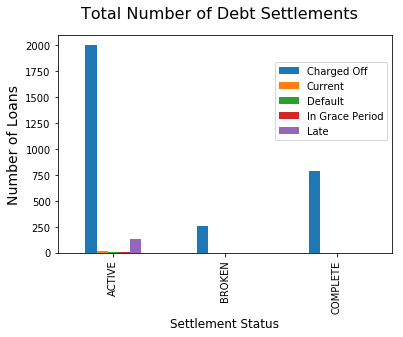

In [28]:
#Plot Debt Settlements as a bar graph
Settlement_D.plot(kind='bar')
#labelthe X and Y values and adjust the fontsize
pp.ylabel('Number of Loans', fontsize=14)
pp.xlabel('Settlement Status', fontsize=12)
#Add a title and adjust the fontsize
pp.suptitle('Total Number of Debt Settlements', fontsize=16)
#Change the legend labels and position
pp.legend(labels=['Charged Off', 'Current', 'Default', 'In Grace Period', 'Late'], bbox_to_anchor=(1.0, 0.9))